In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sma
import statsmodels.formula.api as smfa
import statsmodels.tsa.stattools as smstt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
df = pd.read_csv('dataset_crypto.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.90,118.80,107.14,115.91,0.00,1288693175.50,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.49,3.69,3.35,3.59,0.00,62298185.43,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.98,124.66,106.64,112.30,0.00,1249023060.00,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.59,3.78,3.12,3.37,0.00,58594361.23,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.25,113.44,97.70,111.50,0.00,1240593600.00,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [3]:
df.shape

(72946, 10)

In [4]:
df.date = pd.DatetimeIndex(df.date)
df.date.describe()

count                   72946
unique                   3248
top       2022-10-23 00:00:00
freq                       56
first     2013-05-05 00:00:00
last      2022-10-23 00:00:00
Name: date, dtype: object

In [5]:
df = df.set_index(df.date)
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
date,,,,,,,,,,
2013-05-05,0,112.90,118.80,107.14,115.91,0.00,1288693175.50,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
2013-05-05,1,3.49,3.69,3.35,3.59,0.00,62298185.43,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2013-05-06,2,115.98,124.66,106.64,112.30,0.00,1249023060.00,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
2013-05-06,3,3.59,3.78,3.12,3.37,0.00,58594361.23,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
2013-05-07,4,112.25,113.44,97.70,111.50,0.00,1240593600.00,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [61]:
df = df[df['crypto_name'] == 'Bitcoin']
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
date,,,,,,,,,,
2013-05-05,0,112.90,118.80,107.14,115.91,0.00,1288693175.50,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
2013-05-06,2,115.98,124.66,106.64,112.30,0.00,1249023060.00,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
2013-05-07,4,112.25,113.44,97.70,111.50,0.00,1240593600.00,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
2013-05-08,7,109.60,115.78,109.60,113.57,0.00,1264049202.15,2013-05-08T23:59:59.999Z,Bitcoin,2013-05-08
2013-05-09,9,113.20,113.46,109.26,112.67,0.00,1254535382.00,2013-05-09T23:59:59.999Z,Bitcoin,2013-05-09
...,...,...,...,...,...,...,...,...,...,...
2022-09-25,72692,18936.31,19134.73,18696.47,18802.10,23359966112.45,360259346858.07,2022-09-25T23:59:59.999Z,Bitcoin,2022-09-25
2022-10-02,72752,19311.85,19370.31,18970.62,19044.11,20765955327.49,365024821953.69,2022-10-02T23:59:59.999Z,Bitcoin,2022-10-02
2022-10-09,72815,19417.48,19542.54,19349.26,19446.43,16837262532.25,372876821416.38,2022-10-09T23:59:59.999Z,Bitcoin,2022-10-09


Так как цены на лайтконы сильно отличаются от биткоинов, я решила анализировать только одну криптовалюту - биткоин.

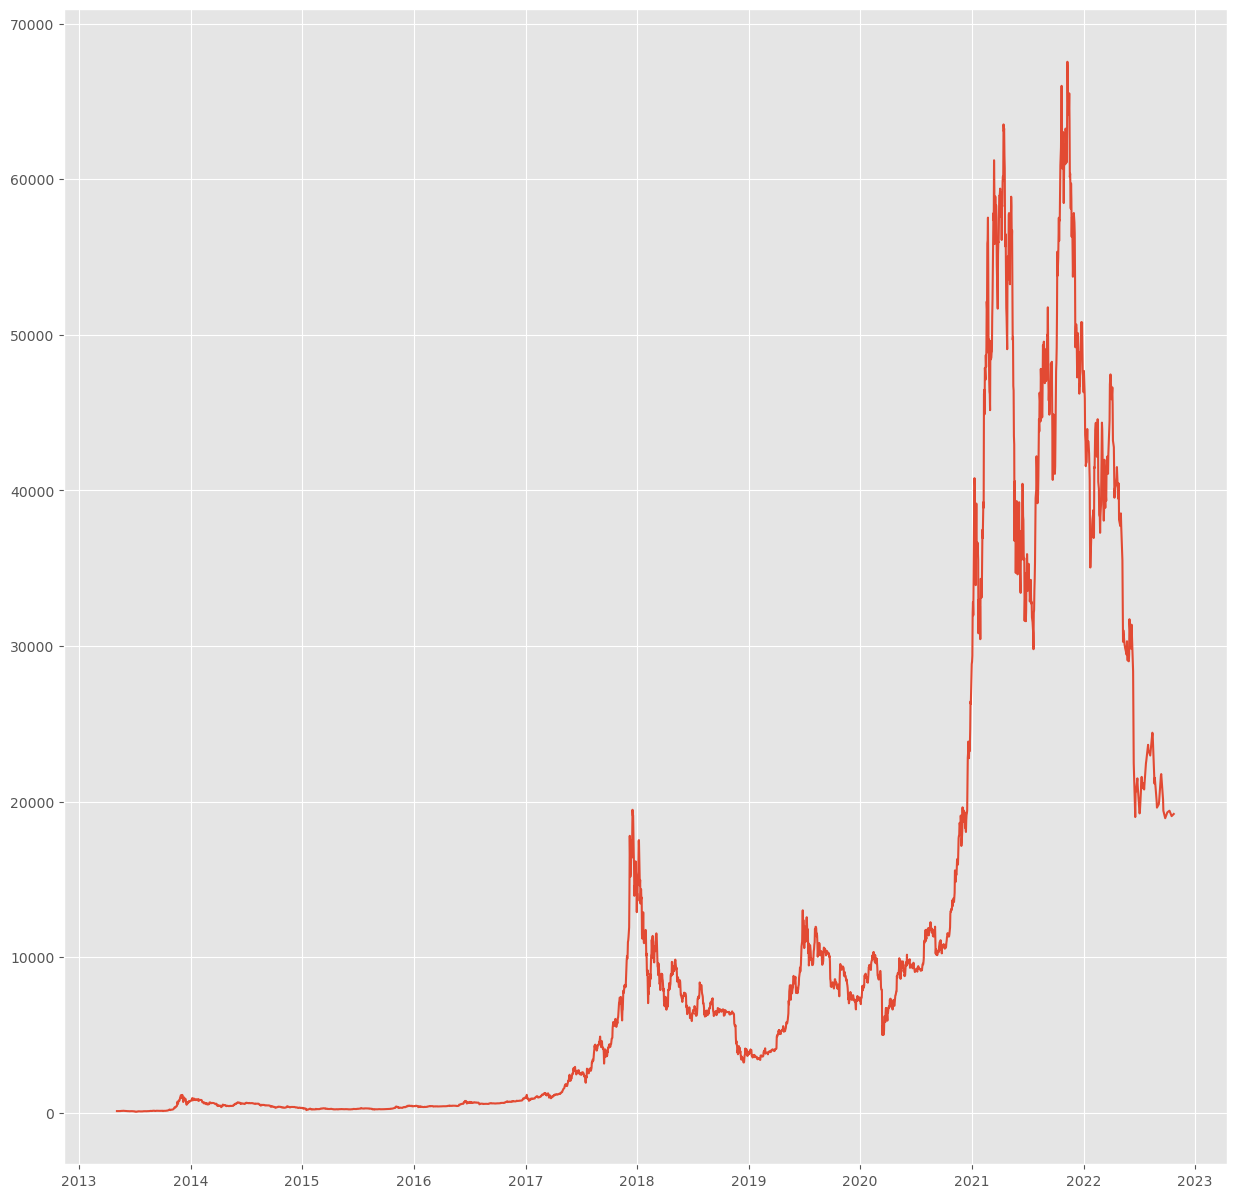

In [62]:
plt.plot(df.open)

Таким образом выглядит неоднородный временной ряд с изменениями в цене биткоина за 10-летний период.

In [63]:
df['open_log'] = np.log(df.open)
#рассчитаем лаги
df_new = df.open_log.shift()
df["open_Diff"] = df.open_log - df_new
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,open_log,open_Diff
date,,,,,,,,,,,,
2013-05-05,0,112.90,118.80,107.14,115.91,0.00,1288693175.50,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,4.73,NaN
2013-05-06,2,115.98,124.66,106.64,112.30,0.00,1249023060.00,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,4.75,0.03
2013-05-07,4,112.25,113.44,97.70,111.50,0.00,1240593600.00,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,4.72,-0.03
2013-05-08,7,109.60,115.78,109.60,113.57,0.00,1264049202.15,2013-05-08T23:59:59.999Z,Bitcoin,2013-05-08,4.70,-0.02
2013-05-09,9,113.20,113.46,109.26,112.67,0.00,1254535382.00,2013-05-09T23:59:59.999Z,Bitcoin,2013-05-09,4.73,0.03


In [64]:
df.shape

(3248, 12)

In [65]:
# ACF
lst = []
from statsmodels.tsa.stattools import acf
for i in range(3248//10):
    df_observed = df.open_Diff[i*10:(i+1)*10]
    df_observed = df_observed.replace(0, np.nan).bfill()
    df_observed.dropna(inplace = True)
    lag_acf = acf(df_observed, nlags=1)
    lst.append(lag_acf[1])
lst = np.array(lst)
lst = lst[~np.isnan(lst)]
lst = list(lst)
max(lst),min(lst)

(0.5097276440700702, -0.7057942148190994)

Функция ACF позволяет оценить, является ли ряд стационарным, выбрать подходящие параметры для модели ARIMA и заметить закономерности в сезонности изменений.

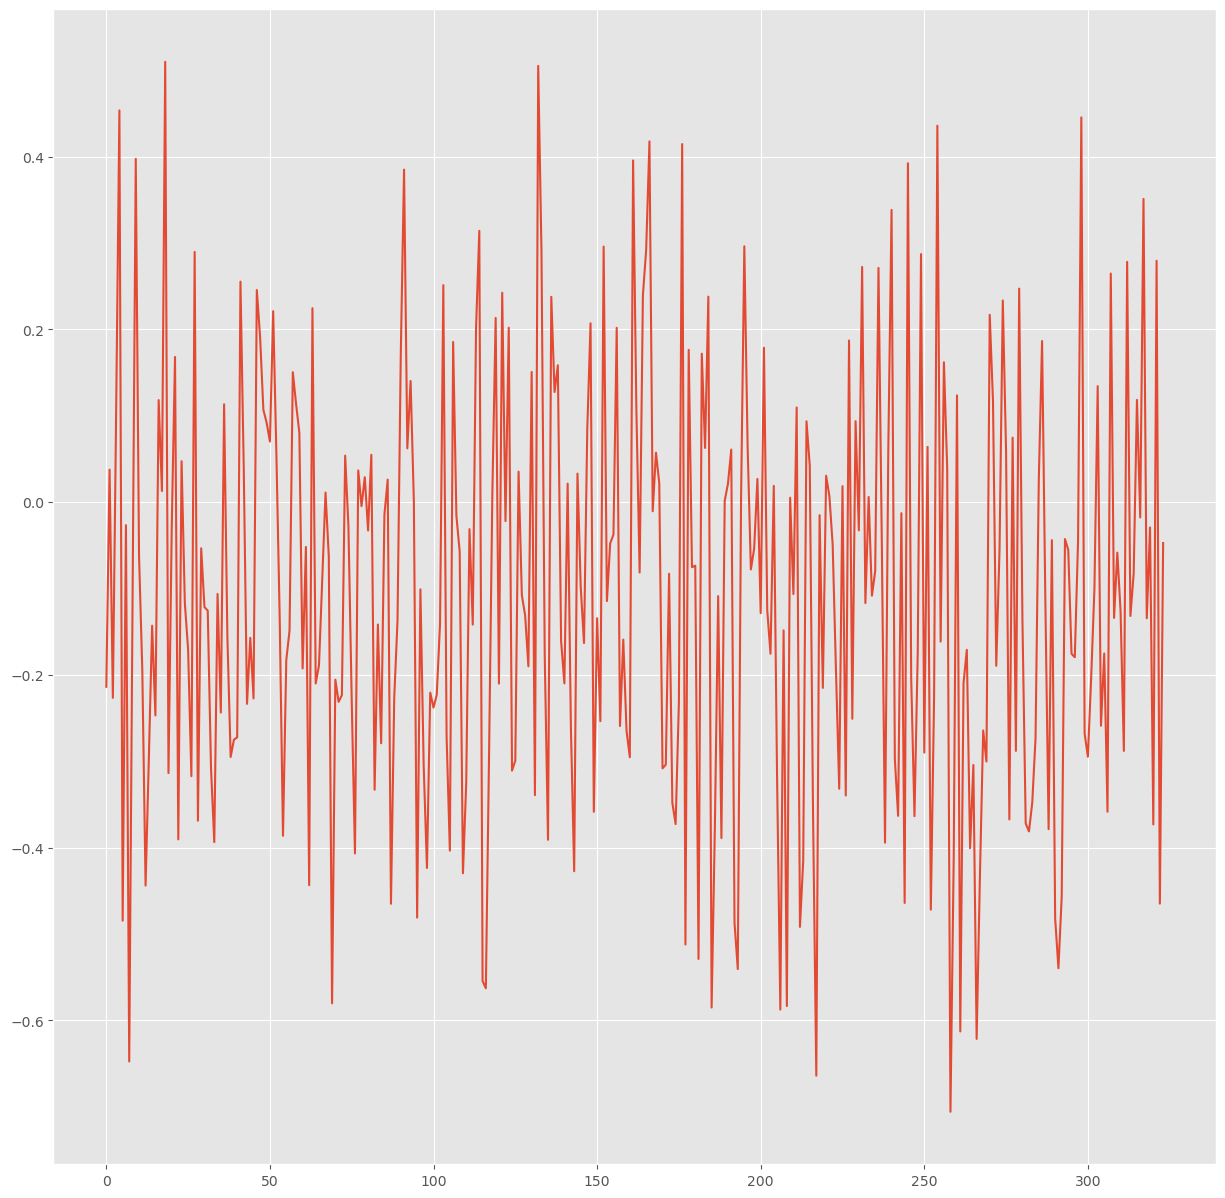

In [66]:
plt.plot(lst)

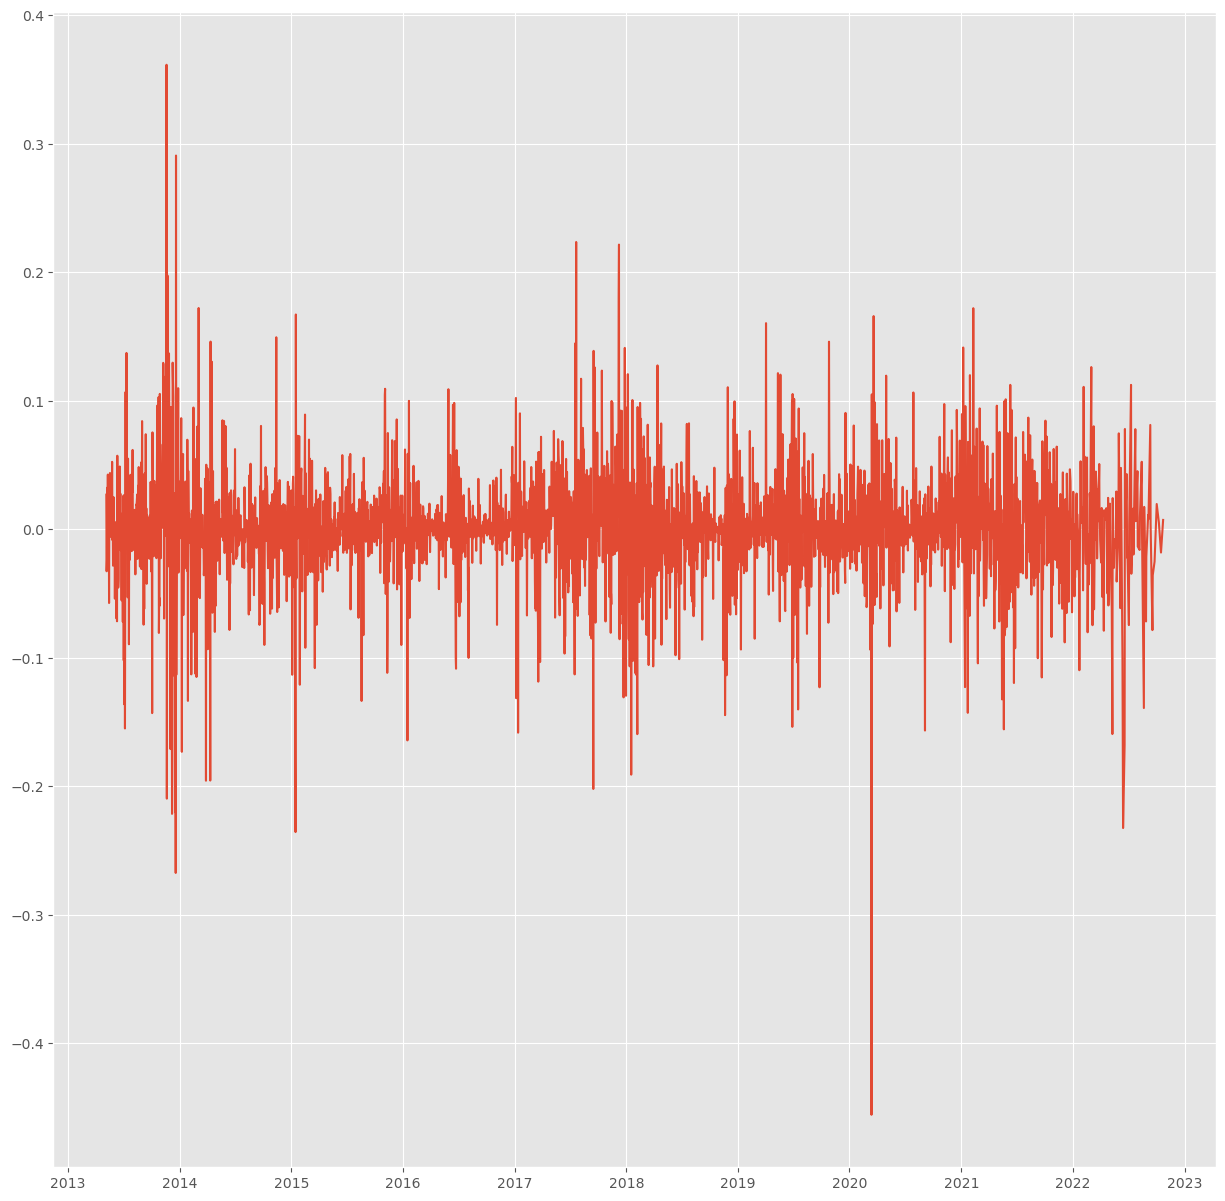

In [72]:
mean = df.open.mean()
plt.plot(df.open_Diff)

Заметим, что логарифмированный ряд со сдвигом во временном промежутке на 1 больше похож на стационарный. Проверим это специальным встроенным тестом, не забыв перед этим заполнить все неизвестные значения нулями.

In [79]:
df.open_Diff = df.open_Diff.replace(0, np.nan).bfill()

In [80]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df.open_Diff)
test

(-11.69132672033459,
 1.6500495405449534e-21,
 16,
 3231,
 {'1%': -3.432375534789404,
  '5%': -2.862434959537509,
  '10%': -2.567246406496528},
 -11127.417824928863)

pvalue меньше 0.05, поэтому мы принимаем гипотезу о том, что логарифмированный ряд diff стационарен.

In [89]:
df.open_Diff.shape

(3248,)

In [102]:
lst = []
for i in range(3248//10):
    df_observed = df.open_Diff[i*10:(i+1)*10]
    df_observed = df_observed.replace(0, np.nan).bfill()
    df_observed.dropna(inplace = True)
    mean = df_observed.mean()
    lst.append(mean)
lst = np.array(lst)
lst = lst[~np.isnan(lst)]
lst = list(lst)
len(lst)

324

Попробуем предсказать критическую точку в неоднородном временном ряду, рассчитав показатель Херста. 

In [103]:
df['open_oldDiff'] = df['open_Diff']
for i in range(len(lst)):
    df['open_Diff'][i*10:(i+1)*10] = df['open_Diff'][i*10:(i+1)*10] - lst[i]
df.open_Diff

date
2013-05-05   -0.05
2013-05-06    0.13
2013-05-07   -0.05
2013-05-08    0.04
2013-05-09   -0.02
              ... 
2022-09-25   -0.03
2022-10-02    0.02
2022-10-09    0.01
2022-10-16   -0.02
2022-10-23    0.01
Name: open_Diff, Length: 3248, dtype: float64

In [130]:
vars = []
for i in range(len(lst)):
    var = df['open_Diff'][i*10:(i+1)*10].std()
    var = var*var
    vars.append(var)
len(vars)

324

In [131]:
sum = 0
for i in range(len(lst)):
    sum += vars[i]
sum

0.8131389846226786

In [132]:
import math
F = math.sqrt(sum/324)
F

0.050096788561184935

In [135]:
H = (np.log(F))/np.log(324)
H

-0.5178915766358227

Заметим, что показатель меньше 0.5, что значит, что исходный временной ряд не персистентный.